In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#%matplotlib inline 
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# read data

df_train=pd.read_csv('train.csv')

In [3]:
df_train.head(10)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
5,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2
8,T0005689473,106.80,C,3.0,NaN,NaN,A,3.14625,0,NaN,58,92,Male,2
9,T0005689474,107.19,D,5.0,3.04467,B,A,2.44375,1,NaN,58,83,Male,3


In [4]:
df_test = pd.read_csv('test.csv')

In [5]:
df_test

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87390,T0005908503,29.43,C,3.0,2.40720,C,A,0.99750,0,74.0,48,72,Female
87391,T0005908504,14.83,C,10.0,2.57009,A,D,4.74375,0,109.0,42,60,Female
87392,T0005908505,37.86,A,6.0,3.08227,C,A,1.63500,0,NaN,57,77,Male
87393,T0005908511,10.63,C,1.0,NaN,NaN,J,2.59875,1,107.0,51,77,Male


In [6]:
# summarry of data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [7]:
#  columns name in data

df_train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [8]:
# datatype of each columns in dataset

df_train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [9]:
# check for null in data
df_train.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [10]:
#  dropping all null values
df_train=df_train.dropna()

In [11]:
df_train.describe().style.background_gradient()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,41608.000000,41608.000000,41608.000000,41608.000000,41608.000000,41608.000000,41608.000000,41608.000000,41608.000000
mean,44.267331,6.214574,2.833954,2.879684,0.830970,63.964190,51.580057,77.502836,2.248077
std,25.370400,3.622083,0.217166,0.968813,1.055508,21.794292,4.996794,11.372551,0.700616
min,1.540000,0.000000,1.911050,0.001250,0.000000,30.000000,41.000000,52.000000,1.000000
25%,24.870000,3.000000,2.693090,2.205000,0.000000,45.000000,48.000000,69.000000,2.000000
50%,38.180000,7.000000,2.826865,2.940000,1.000000,61.000000,51.000000,76.000000,2.000000
75%,60.630000,10.000000,2.967570,3.603750,1.000000,79.000000,54.000000,84.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,7.000000,179.000000,124.000000,206.000000,3.000000


In [12]:
# summmrizing target variavle

tg= df_train['Surge_Pricing_Type'].value_counts().to_frame()
tg = pd.DataFrame({"target":tg.index,'Count':tg['Surge_Pricing_Type']})


tg
tg

,target,Count
2,2,18624
3,3,16653
1,1,6331


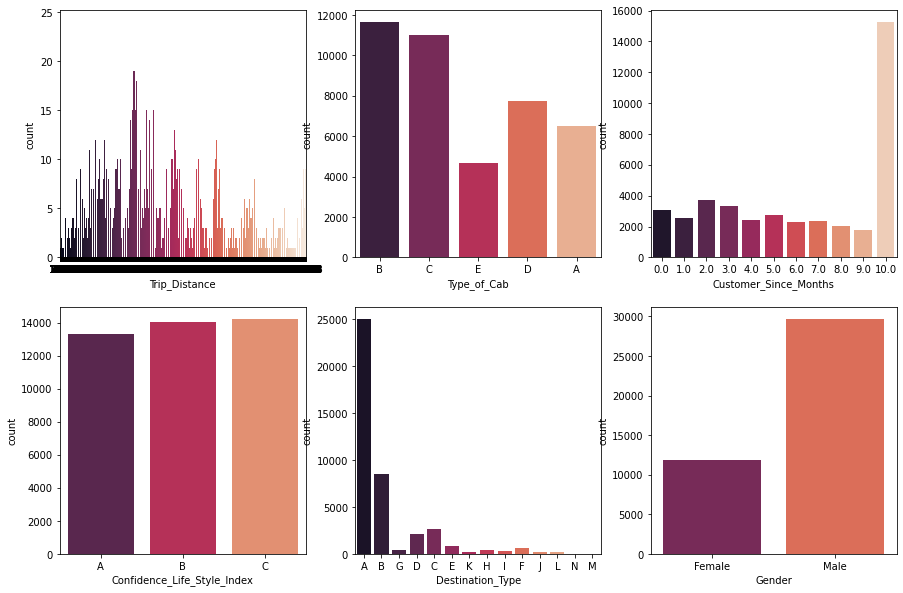

In [13]:
# visualize data

import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x = df_train['Trip_Distance'], data = df_train, palette='rocket', ax=axes[0,0])
sns.countplot(x = df_train['Type_of_Cab'], data = df_train, palette='rocket', ax=axes[0,1])
sns.countplot(x = df_train['Customer_Since_Months'], data = df_train, palette='rocket', ax=axes[0,2])


sns.countplot(x = df_train['Confidence_Life_Style_Index'], data = df_train, palette='rocket', ax=axes[1,0])
sns.countplot(x = df_train['Destination_Type'], data = df_train, palette='rocket', ax=axes[1,1])
sns.countplot(x = df_train['Gender'], data = df_train, palette='rocket', ax=axes[1,2])
plt.show()

In [14]:
# creating dummies as some of our data contains string datatype 
# and machine-learning model only work with int-datatype hence creating dummies

x = pd.get_dummies(df_train.drop('Trip_ID', axis=1))
x.shape

(41608, 33)

In [15]:
x

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_A,...,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,0,...,0,0,0,0,0,0,0,0,1,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1
6,29.72,10.0,2.83958,2.97500,1,83.0,50,75,2,0,...,0,0,0,0,0,0,0,0,0,1
7,18.44,2.0,2.81871,3.58250,0,103.0,46,63,2,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131642,15.93,3.0,2.36752,4.53125,0,98.0,42,54,2,0,...,1,0,0,0,0,0,0,0,1,0
131656,22.90,10.0,2.51438,1.47250,2,33.0,52,78,3,0,...,0,0,0,0,0,0,0,0,1,0
131657,11.72,1.0,2.74229,3.28500,0,61.0,47,76,3,0,...,0,0,0,0,0,0,0,0,0,1
131660,46.88,4.0,3.04744,4.15750,1,47.0,54,79,2,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
y=df_train.Surge_Pricing_Type

In [17]:
# reducing one value of encoded target variavle
y = y-1

In [18]:
# spiltting data into test and train

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
# using model logistric regression classifier

from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# accuracy achieved 
clf.score(x_test, y_test)

0.9437635183850036